In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.version.version

'1.21.4'

In [3]:
gizi = pd.read_excel("dataset_gizi.xlsx")
gizi.head()

,No,Balita ke-,TB,BB
0,1,Balita 1,52.0,5.8
1,2,Balita 2,51.0,5.0
2,3,Balita 3,71.5,8.5
3,4,Balita 4,55.0,5.5
4,5,Balita 5,92.5,6.5


In [4]:
gizi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          10 non-null     int64  
 1   Balita ke-  10 non-null     object 
 2   TB          10 non-null     float64
 3   BB          10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [5]:
gizi_x = gizi.iloc[:,2:4]
gizi_x.head()

,TB,BB
0,52.0,5.8
1,51.0,5.0
2,71.5,8.5
3,55.0,5.5
4,92.5,6.5


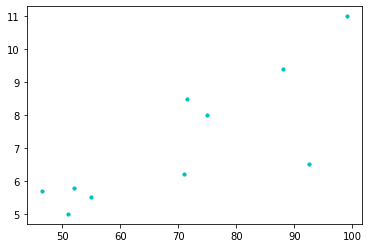

In [6]:
plt.scatter(gizi.TB, gizi.BB, s=10, c="c", marker='o', alpha=1)
plt.show()

In [8]:
x_array = np.array(gizi_x)
print(x_array)

[[52.   5.8]
 [51.   5. ]
 [71.5  8.5]
 [55.   5.5]
 [92.5  6.5]
 [46.5  5.7]
 [75.   8. ]
 [99.  11. ]
 [88.   9.4]
 [71.   6.2]]


In [9]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.1047619 , 0.13333333],
       [0.08571429, 0.        ],
       [0.47619048, 0.58333333],
       [0.16190476, 0.08333333],
       [0.87619048, 0.25      ],
       [0.        , 0.11666667],
       [0.54285714, 0.5       ],
       [1.        , 1.        ],
       [0.79047619, 0.73333333],
       [0.46666667, 0.2       ]])

In [10]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)

C:\Users\Jeremyas Cornelis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

In [12]:
print(kmeans.cluster_centers_)
gizi["cluster"] = kmeans.labels_
gizi.head()

[[0.50952381 0.54166667]
 [0.08809524 0.08333333]
 [0.8952381  0.86666667]
 [0.87619048 0.25      ]
 [0.46666667 0.2       ]]


,No,Balita ke-,TB,BB,cluster
0,1,Balita 1,52.0,5.8,1
1,2,Balita 2,51.0,5.0,1
2,3,Balita 3,71.5,8.5,0
3,4,Balita 4,55.0,5.5,1
4,5,Balita 5,92.5,6.5,3


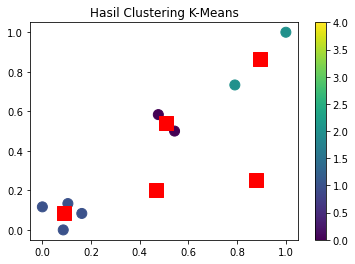

In [15]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=100, c=gizi.cluster, marker="o", alpha=1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1, marker='s')
plt.title("Hasil Clustering K-Means")
plt.colorbar(output)
plt.show()

## Clustering dengan DBScan

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [19]:
X, y = make_moons(n_samples=500, noise=0.1)

Text(0, 0.5, '$x_2$')

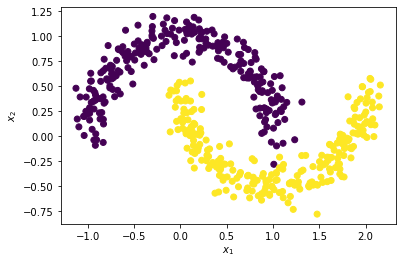

In [20]:
plt.scatter(X[:,0], X[:,1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

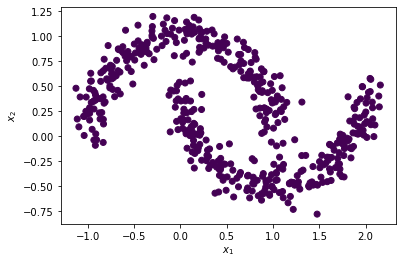

In [21]:
# menggunakan parameter default

dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan_cluster1.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

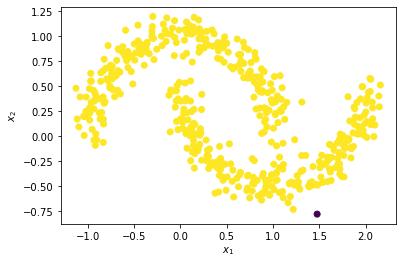

In [22]:
# menggunakan parameter (nilai epsilon=0.2 dan minimum Points=5)

dbscan_cluster2 = DBSCAN(eps=0.2, min_samples=5)
dbscan_cluster2.fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan_cluster2.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

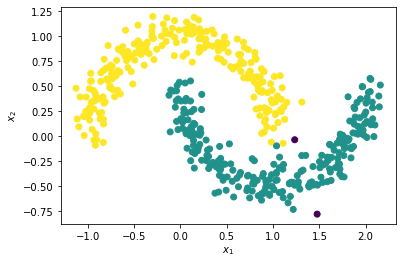

In [23]:
# menggunakan parameter (nilai epsilon=0.2 dan minimum Points=15)

dbscan_cluster3 = DBSCAN(eps=0.2, min_samples=15)
dbscan_cluster3.fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan_cluster3.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

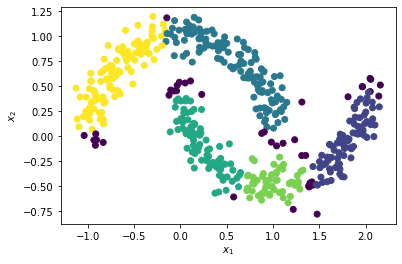

In [24]:
# menggunakan parameter (nilai epsilon=0.2 dan minimum Points=25)

dbscan_cluster4 = DBSCAN(eps=0.2, min_samples=25)
dbscan_cluster4.fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan_cluster4.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")